# Main task: Try new method

## !!!Test section start, please disregard

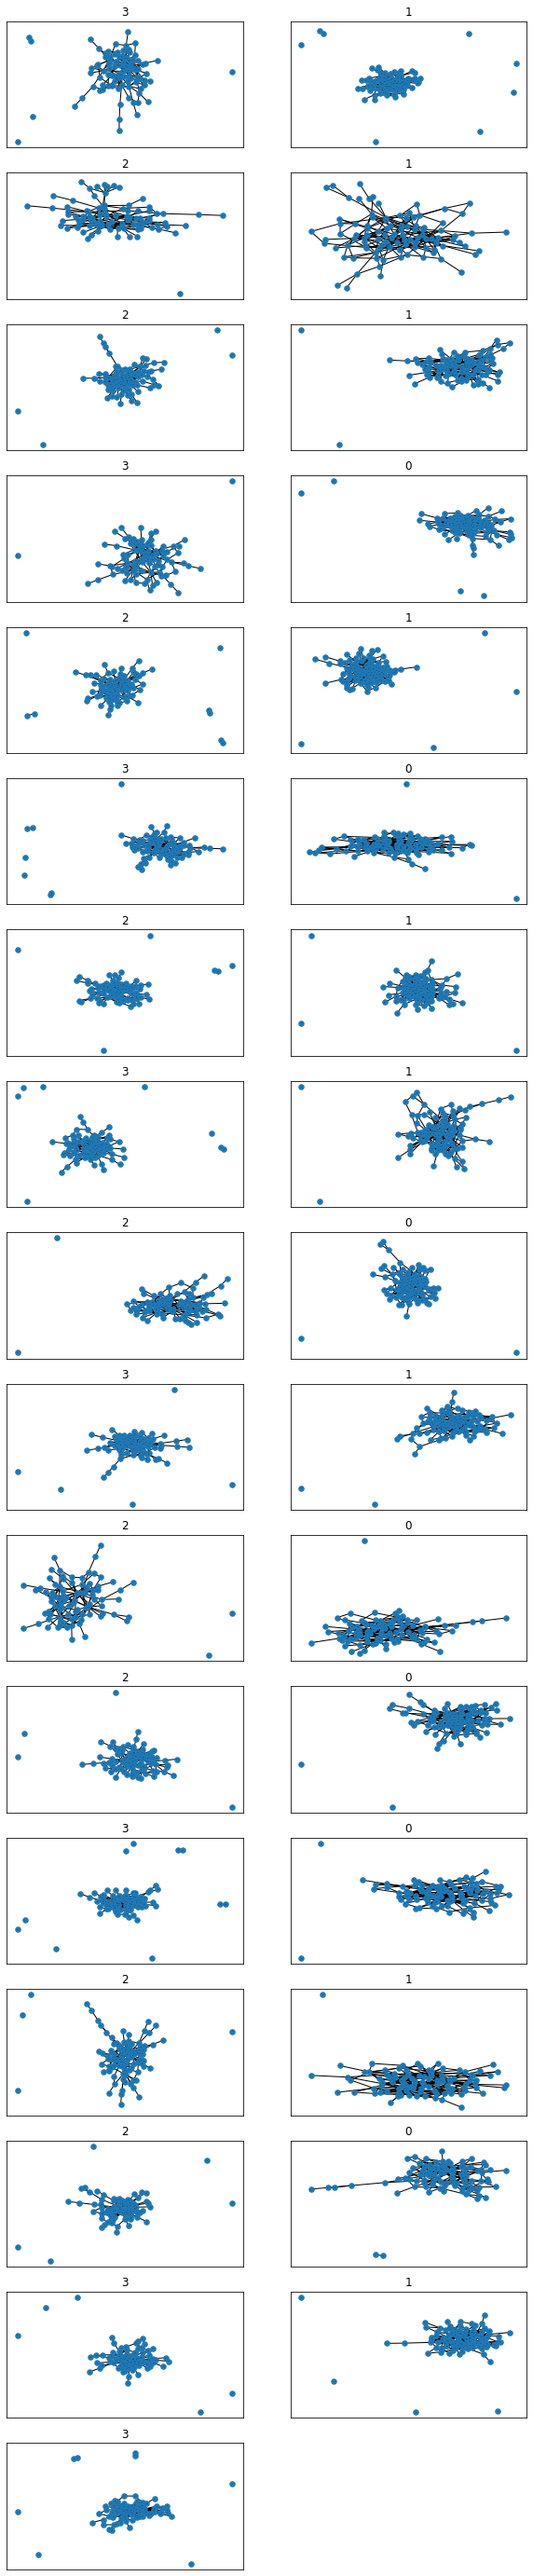

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
# f = open('pytorch_DGCNN-master/data/DEMO10/DEMO10.txt', 'r')
# f = open('pytorch_DGCNN-master/data/MUTAG/MUTAG.txt', 'r')
f = open('pytorch_DGCNN-master/data/Synthie/Synthie.txt', 'r')
is_obj_graph = False
num_classes = 55
num_graphs = int(f.readline())
num_columns = 2
num_rows = (num_graphs // num_columns) + 1
# print(num_graphs)
plt.figure(figsize=(10, 600))
for i in range(num_graphs // 12):
    # for one graph
    g_info = f.readline().split()
    num_vertices = int(g_info[0])
    label = g_info[1]
#     print(num_vertices)
    G = nx.Graph()
    if is_obj_graph:
        colors = []
    for j in range(num_vertices):
        # for one vertex
        vertex_info = f.readline().split()
        num_nbs = int(vertex_info[1])
        if is_obj_graph:
            obj_class = vertex_info[num_nbs+2:].index("1")
            colors.append(obj_class/num_classes)
        if num_nbs == 0:
            G.add_node(j)
        else:
            for k in range(2, num_nbs + 2):
                G.add_edge(j, int(vertex_info[k]))
    plt.subplot(num_rows, num_columns, i+1)
    plt.title(label)
    options = {
    "font_size": 1,
    "node_size": 30,
#     "node_color": "white",
#     "edgecolors": "black",
#     "linewidths": 5,
#     "width": 5,
    }
#     colors = [i/len(G.nodes) for i in range(len(G.nodes))]
    if is_obj_graph:
        nx.draw_networkx(G, **options, node_color=colors)
    else:
        nx.draw_networkx(G, **options)
f.close()

In [8]:
import util
util.generate_labels("sample_rooms_10.txt")

{'02b33dfb-be2b-2d54-92d2-cd012b2b3c40': 0,
 'fcf66d9e-622d-291c-84c2-bb23dfe31327': 0,
 '02b33df9-be2b-2d54-9062-1253be3ce186': 0,
 '02b33dfd-be2b-2d54-91d2-55454852009e': 0,
 '02b33e01-be2b-2d54-93fb-4145a709cec5': 1,
 'fcf66d8a-622d-291c-8429-0e1109c6bb26': 1,
 'fcf66d88-622d-291c-871f-699b2d063630': 1,
 '02b33e03-be2b-2d54-9129-5d28efdd68fa': 1,
 '095821f7-e2c2-2de1-9568-b9ce59920e29': 2,
 '2e369567-e133-204c-909a-c5da44bb58df': 2,
 '095821f9-e2c2-2de1-9707-8f735cd1c148': 2,
 '095821fb-e2c2-2de1-94df-20f2cb423bcb': 2,
 '0958220d-e2c2-2de1-9710-c37018da1883': 3,
 '0958220b-e2c2-2de1-96bc-739f09c1e8f8': 3,
 '09582205-e2c2-2de1-9475-1cdac7639e60': 3,
 '09582207-e2c2-2de1-972c-225d968c2ab4': 3,
 '09582209-e2c2-2de1-9610-08baed932919': 3,
 '09582212-e2c2-2de1-9700-fa44b14fbded': 4,
 '0958221b-e2c2-2de1-96b1-6233099811a0': 4,
 '09582214-e2c2-2de1-956a-64d8da4ba7cc': 4,
 '09582216-e2c2-2de1-97de-efcab1ef9c43': 4,
 '09582219-e2c2-2de1-9534-519142703037': 4,
 '09582225-e2c2-2de1-9564-f6681e

In [16]:
# Test get_scan_emb_info
import matplotlib.pyplot as plt
from PIL import Image
import vlad_emb
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.decomposition import PCA
import util
from os.path import join
import numpy as np
import random

emb_info = util.get_scan_emb_info("0a4b8ef6-a83a-21f2-8672-dce34dd0d7ca")
number_of_rows = emb_info.shape[0]
print(number_of_rows)
random_indices = np.random.choice(number_of_rows,
                                  size=5,
                                  replace=False)
 
# display random rows
rows = emb_info[random_indices, :]
for row in rows:
    print(row[:3])

50
tensor([ 0.5719, -0.0194,  0.3614], dtype=torch.float64)
tensor([ 0.3418, -0.4297,  0.2509], dtype=torch.float64)
tensor([ 1.1479, -1.4356,  0.4177], dtype=torch.float64)
tensor([ 0.8057, -0.4072, -0.0408], dtype=torch.float64)
tensor([-0.9896,  0.3697, -0.5260], dtype=torch.float64)


[6, 0, 1]

In [4]:
import util
util.get_object_class(1000)

{'box': tensor([1, 0, 0, 0, 0], dtype=torch.int32),
 'shelf': tensor([0, 1, 0, 0, 0], dtype=torch.int32),
 'plant': tensor([0, 0, 1, 0, 0], dtype=torch.int32),
 'chair': tensor([0, 0, 0, 1, 0], dtype=torch.int32),
 'pillow': tensor([0, 0, 0, 0, 1], dtype=torch.int32)}

In [1]:
import util
util.get_object_info_json('3rscan/0a4b8ef6-a83a-21f2-8672-dce34dd0d7ca/semseg.v2.json', 600)

SyntaxError: invalid syntax (util.py, line 303)

In [6]:
# Test Choose
# import module
import numpy as np
 
# create 2D array
the_array = np.arange(16).reshape((4, 4))
 
number_of_rows = the_array.shape[0]
random_indices = np.random.choice(number_of_rows,
                                  size=2,
                                  replace=False)
 
# display random rows
rows = the_array[random_indices, :]
print(rows)

[[ 8  9 10 11]
 [ 4  5  6  7]]


## !!!Test section end

## 3.1.2) Visulize data.txt

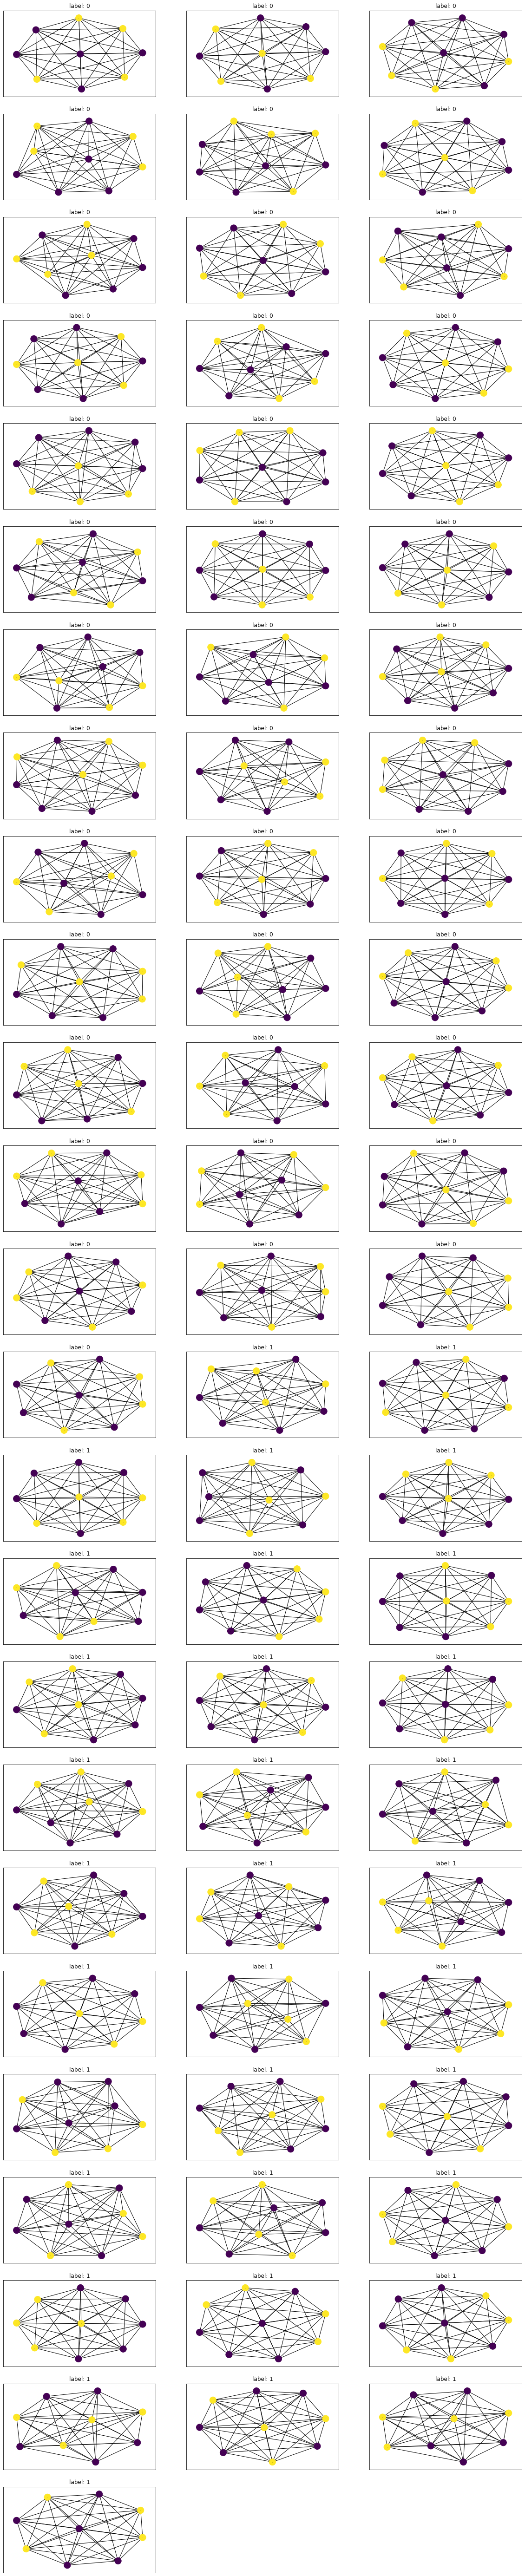

In [2]:
import util
util.visualize_graph(data="pytorch_DGCNN-master/data/DEMO10/DEMO10.txt", node_size=200, nth=6, \
                     num_columns=3, figsize=(20,600), is_color_graph=True)

## 3.1.1) Build data.txt

In [6]:
import util
util.build_dataset_combined(rooms_path='sample_rooms_10.txt', target_name='DEMO10', 
                pos_ind=0, feat_ind=1, base=0, method=0, ratio=5, threshold=100)
!head -40 ./pytorch_DGCNN-master/data/DEMO10/DEMO10.txt

440
9 0
1 8 1 2 3 4 5 6 7 8 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
1 8 0 2 3 4 5 6 7 8 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 8 0 1 3 4 5 6 7 8 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

## 3.2) Build up cross validation

In [11]:
import util
util.build_cv_split_10fold('DEMO10', 440, 10)
!cat ./pytorch_DGCNN-master/data/DEMO10/10fold_idx/test_idx-1.txt

55
262
282
17
316
298
336
275
195
178


## 3.3) Run DGCNN

In [15]:
%cd ..
!pwd

In [12]:
%cd pytorch_DGCNN-master
!pwd
# With feature
!CUDA_VISIBLE_DEVICES=0 python main.py       \
-seed 1       \
-data DEMO10       \
-fold 3       \
-learning_rate 0.001       \
-num_epochs 100      \
-hidden 128       \
-latent_dim 64-32-32-16-8       \
-sortpooling_k 1       \
-out_dim 32       \
-batch_size 64       \
-gm DGCNN       \
-mode gpu       \
-dropout True       \
-test_number 10 \
-extract_features True \
-max_lv 5 \
-visualize_process True

[Errno 2] No such file or directory: 'pytorch_DGCNN-master'
/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
====== begin of gnn configuration ======
| msg_average = 0
======   end of gnn configuration ======
Namespace(batch_size=64, conv1d_activation='ReLU', data='DEMO10', dropout=True, edge_feat_dim=0, extract_features=True, feat_dim=0, fold=3, gm='DGCNN', hidden=128, latent_dim=[64, 32, 32, 16, 8], learning_rate=0.001, max_lv=5, mode='gpu', num_class=0, num_epochs=100, out_dim=32, printAUC=False, seed=1, sortpooling_k=1.0, test_number=10, visualize_process=True)
loading data
# classes: 10
# maximum node tag: 2
# train: 430, # test: 10
k used in SortPooling is: 10
Initializing DGCNN
loss: 2.29655 acc: 0.15625: 100%|██████████████| 6/6 [00:00<00:00,  8.35batch/s]
average training of epoch 0: loss 2.30389 acc 0.09375 auc 0.00000
loss: 2.34278 acc: 0.00000: 100%|█████████████| 1/1 [00:00<00:00, 

loss: 0.22222 acc: 0.93750: 100%|██████████████| 6/6 [00:00<00:00, 65.75batch/s]
average training of epoch 24: loss 0.29711 acc 0.89583 auc 0.00000
loss: 1.15069 acc: 0.40000: 100%|█████████████| 1/1 [00:00<00:00, 298.02batch/s]
average test of epoch 24: loss 1.15069 acc 0.40000 auc 0.00000
loss: 0.35065 acc: 0.84375: 100%|██████████████| 6/6 [00:00<00:00, 63.87batch/s]
average training of epoch 25: loss 0.25913 acc 0.92448 auc 0.00000
loss: 1.02383 acc: 0.50000: 100%|█████████████| 1/1 [00:00<00:00, 320.03batch/s]
average test of epoch 25: loss 1.02383 acc 0.50000 auc 0.00000
loss: 0.31048 acc: 0.85938: 100%|██████████████| 6/6 [00:00<00:00, 58.35batch/s]
average training of epoch 26: loss 0.26269 acc 0.91667 auc 0.00000
loss: 1.15836 acc: 0.40000: 100%|█████████████| 1/1 [00:00<00:00, 318.18batch/s]
average test of epoch 26: loss 1.15836 acc 0.40000 auc 0.00000
loss: 0.32606 acc: 0.89062: 100%|██████████████| 6/6 [00:00<00:00, 63.43batch/s]
average training of epoch 27: loss 0.29470 

loss: 0.06065 acc: 0.98438: 100%|██████████████| 6/6 [00:00<00:00, 63.77batch/s]
average training of epoch 51: loss 0.03854 acc 0.99219 auc 0.00000
loss: 0.57432 acc: 0.80000: 100%|█████████████| 1/1 [00:00<00:00, 292.80batch/s]
average test of epoch 51: loss 0.57432 acc 0.80000 auc 0.00000
loss: 0.04753 acc: 0.98438: 100%|██████████████| 6/6 [00:00<00:00, 59.98batch/s]
average training of epoch 52: loss 0.04465 acc 0.98958 auc 0.00000
loss: 0.38865 acc: 0.80000: 100%|█████████████| 1/1 [00:00<00:00, 226.62batch/s]
average test of epoch 52: loss 0.38865 acc 0.80000 auc 0.00000
loss: 0.02331 acc: 1.00000: 100%|██████████████| 6/6 [00:00<00:00, 64.29batch/s]
average training of epoch 53: loss 0.04089 acc 0.98958 auc 0.00000
loss: 0.54450 acc: 0.80000: 100%|█████████████| 1/1 [00:00<00:00, 279.16batch/s]
average test of epoch 53: loss 0.54450 acc 0.80000 auc 0.00000
loss: 0.02374 acc: 1.00000: 100%|██████████████| 6/6 [00:00<00:00, 65.67batch/s]
average training of epoch 54: loss 0.03467 

loss: 0.01016 acc: 1.00000: 100%|██████████████| 6/6 [00:00<00:00, 64.26batch/s]
average training of epoch 78: loss 0.01135 acc 0.99740 auc 0.00000
loss: 0.14348 acc: 0.90000: 100%|█████████████| 1/1 [00:00<00:00, 285.40batch/s]
average test of epoch 78: loss 0.14348 acc 0.90000 auc 0.00000
loss: 0.02168 acc: 0.98438: 100%|██████████████| 6/6 [00:00<00:00, 64.53batch/s]
average training of epoch 79: loss 0.01200 acc 0.99740 auc 0.00000
loss: 0.11264 acc: 1.00000: 100%|█████████████| 1/1 [00:00<00:00, 283.86batch/s]
average test of epoch 79: loss 0.11264 acc 1.00000 auc 0.00000
loss: 0.02570 acc: 0.98438: 100%|██████████████| 6/6 [00:00<00:00, 63.12batch/s]
average training of epoch 80: loss 0.01915 acc 0.99479 auc 0.00000
loss: 0.28078 acc: 0.80000: 100%|█████████████| 1/1 [00:00<00:00, 316.05batch/s]
average test of epoch 80: loss 0.28078 acc 0.80000 auc 0.00000
loss: 0.01245 acc: 1.00000: 100%|██████████████| 6/6 [00:00<00:00, 65.52batch/s]
average training of epoch 81: loss 0.01546 

In [11]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
p = Image.open('./train_process.png')
p.show()


(eog:126756): EOG-CRITICAL **: 21:30:15.536: eog_image_get_thumbnail: assertion 'EOG_IS_IMAGE (img)' failed

(eog:126756): EOG-CRITICAL **: 21:30:15.756: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:126756): GLib-GIO-CRITICAL **: 21:30:15.756: g_file_get_uri: assertion 'G_IS_FILE (file)' failed

(eog:126756): GLib-GObject-CRITICAL **: 21:30:15.756: g_object_unref: assertion 'G_IS_OBJECT (object)' failed
